In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import data
clinicaltrial = "../Resources/clinicaltrial_data.csv"
mouse_drug = "../Resources/mouse_drug_data.csv"

clinicaltrial_df = pd.read_csv(clinicaltrial)
mouse_drug_df = pd.read_csv(mouse_drug)

In [3]:
# Combined files
combined_data_df = pd.merge(clinicaltrial_df, mouse_drug_df, on='Mouse ID')
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#defining variables
c = "Capomulin"
i = "Infubinol"
k = "Ketapril"
p = "Placebo"
time = combined_data_df["Timepoint"].unique()

In [5]:
drug_timepoint_tumor = combined_data_df.groupby(['Drug', "Timepoint"])["Tumor Volume (mm3)"]
drug_timepoint_tumor_mean = drug_timepoint_tumor.mean()
drugc_mean_45 = drug_timepoint_tumor_mean[c]
drugi_mean_45 = drug_timepoint_tumor_mean[i]
drugk_mean_45 = drug_timepoint_tumor_mean[k]
drugp_mean_45 = drug_timepoint_tumor_mean[p]
tumor_firstdayc = drugc_mean_45[0]
tumor_lastdayc = drugc_mean_45[45]
tumor_firstdayi = drugi_mean_45[0]
tumor_lastdayi = drugi_mean_45[45]
tumor_firstdayk = drugk_mean_45[0]
tumor_lastdayk = drugk_mean_45[45]
tumor_firstdayp = drugp_mean_45[0]
tumor_lastdayp = drugp_mean_45[45]

In [6]:
#calculation of tumor change
tumor_change_drugc = ((drugc_mean_45[45]/drugc_mean_45[0])-1)*100
tumor_change_drugi = ((drugi_mean_45[45]/drugi_mean_45[0])-1)*100
tumor_change_drugk = ((drugk_mean_45[45]/drugk_mean_45[0])-1)*100
tumor_change_drugp = ((drugp_mean_45[45]/drugp_mean_45[0])-1)*100


Text(0, 0.5, '% Tumor Volume Change')

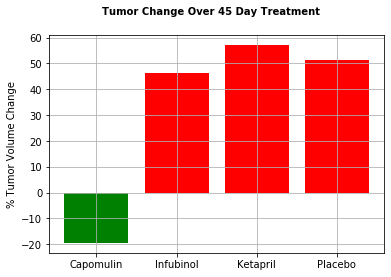

In [28]:
fig, ax = plt.subplots()

ax.bar(c,tumor_change_drugc, color="green", align="center")
ax.bar(i,tumor_change_drugi, color="red")
ax.bar(k,tumor_change_drugk, color="red")
ax.bar(p,tumor_change_drugp, color="red")
ax.grid(True)

fig.suptitle("Tumor Change Over 45 Day Treatment", fontsize=10, fontweight="bold")
ax.set_ylabel("% Tumor Volume Change")

In [9]:
# metastatic (cancer spreading) sites changes over time for each treatment.
drug_timepoint = combined_data_df.groupby(['Drug', "Timepoint"])["Metastatic Sites"]
drug_timepoint_mean = drug_timepoint.mean()

drugc_mean = drug_timepoint_mean[c]#.unique()
drugi_mean = drug_timepoint_mean[i]
drugk_mean = drug_timepoint_mean[k]
drugp_mean = drug_timepoint_mean[p]

In [10]:
#standard deviation calculation
drug_timepoint_sem = drug_timepoint.sem()

drugc_std = drug_timepoint_sem[c]
drugi_std = drug_timepoint_sem[i]
drugk_std = drug_timepoint_sem[k]
drugp_std = drug_timepoint_sem[p]

Text(0.5, 0, 'Treatment Duration (days)')

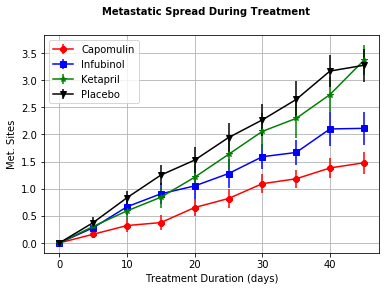

In [11]:
#plotting  metastatic (cancer spreading) sites changes over time for each treatment.
fig, ax2 = plt.subplots()

ax2.errorbar(time,drugc_mean,drugc_std, marker="8", color="red")
ax2.errorbar(time,drugi_mean,drugi_std, marker="s", color="blue")
ax2.errorbar(time,drugk_mean,drugk_std, marker="*", color="green")
ax2.errorbar(time,drugp_mean,drugp_std, marker= "v", color="black")

ax2.legend([c, i, k, p], loc="best") # fancybox=True
ax2.grid(True)

fig.suptitle("Metastatic Spread During Treatment", fontsize=10, fontweight="bold")
ax2.set_ylabel("Met. Sites")
ax2.set_xlabel("Treatment Duration (days)")

In [12]:
#counting number of mice for survival rate calculation
drug_timepoint_count = drug_timepoint.count()

drugc_count = drug_timepoint_count[c]
drugi_count = drug_timepoint_count[i]
drugk_count = drug_timepoint_count[k]
drugp_count = drug_timepoint_count[p]

In [13]:
#survival rate calculation
drugc_survival = (drugc_count/drugc_count[0])*100
drugi_survival = (drugi_count/drugi_count[0])*100
drugk_survival = (drugk_count/drugk_count[0])*100
drugp_survival = (drugp_count/drugp_count[0])*100

Text(0.5, 0, 'Time (days)')

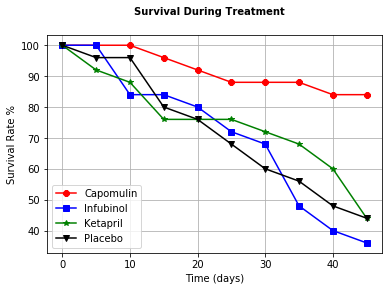

In [14]:
#plotting survival rate
fig, ax3 = plt.subplots()

ax3.errorbar(time,drugc_survival, marker="8", color="red")
ax3.errorbar(time,drugi_survival, marker="s", color="blue")
ax3.errorbar(time,drugk_survival, marker="*", color="green")
ax3.errorbar(time,drugp_survival, marker= "v", color="black")

ax3.legend([c, i, k, p], loc="best")
ax3.grid(True)

fig.suptitle("Survival During Treatment", fontsize=10, fontweight="bold")
ax3.set_ylabel("Survival Rate %")
ax3.set_xlabel("Time (days)")

In [15]:
#tumor response treatment calculations - mean
drug_timepoint_tumor = combined_data_df.groupby(['Drug', "Timepoint"])["Tumor Volume (mm3)"]
drug_timepoint_tumor_mean = drug_timepoint_tumor.mean()


drugc_tumor_mean = drug_timepoint_tumor_mean[c]#.unique()
drugi_tumor_mean = drug_timepoint_tumor_mean[i]
drugk_tumor_mean = drug_timepoint_tumor_mean[k]
drugp_tumor_mean = drug_timepoint_tumor_mean[p]

In [16]:
#standard deviation calculation
drug_timepoint_tumor_std = drug_timepoint_tumor.sem()

drugc_tumor_std = drug_timepoint_tumor_std[c]
drugi_tumor_std = drug_timepoint_tumor_std[i]
drugk_tumor_std = drug_timepoint_tumor_std[k]
drugp_tumor_std = drug_timepoint_tumor_std[p]

Text(0.5, 0, 'Time  (days)')

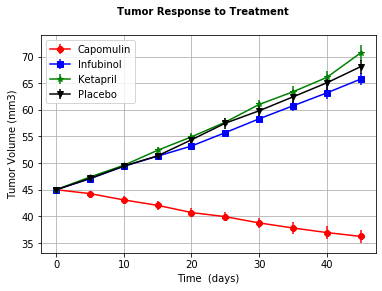

In [17]:
fig, ax4 = plt.subplots()

ax4.errorbar(time,drugc_tumor_mean,drugc_tumor_std, marker="8", color="red")
ax4.errorbar(time,drugi_tumor_mean,drugi_tumor_std, marker="s", color="blue")
ax4.errorbar(time,drugk_tumor_mean,drugk_tumor_std, marker="*", color="green")
ax4.errorbar(time,drugp_tumor_mean,drugp_tumor_std, marker= "v", color="black")

ax4.legend([c, i, k, p], loc="best")
ax4.grid(True)

fig.suptitle("Tumor Response to Treatment", fontsize=10, fontweight="bold")
ax4.set_ylabel("Tumor Volume (mm3)")
ax4.set_xlabel("Time  (days)")